# Multiple Linear Regression and Regression Error Metrics¶

In [4]:
# y = b0 + b1X1 + b2X2 + b3X3    multiple linear regress.

## Import Library

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (8, 4)

import warnings
warnings.filterwarnings("ignore")

## Read Data Set

In [6]:
df = pd.read_csv("Advertising.csv")
df

TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

Advertising.csv veri seti, genellikle lineer regresyon ve veri analizi derslerinde kullanılan klasik bir veri setidir. Bu veri seti, bir ürünün reklam bütçelerinin çeşitli medya türlerine göre dağılımını ve bu bütçelerin ürün satışlarına olan etkisini içerir. Veri seti genellikle şu sütunlardan oluşur:

- TV: TV reklamlarına harcanan bütçe (bin dolar cinsinden).
- Radio: Radyo reklamlarına harcanan bütçe (bin dolar cinsinden).
- Newspaper: Gazete reklamlarına harcanan bütçe (bin dolar cinsinden).
- Sales: Satışlar (bin adet cinsinden).

## Data Preparation -  EDA

In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.isnull()

TV  radio  newspaper  sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]

In [10]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
# !pip install missingno  
# eksik verilerin yapısını ve dagılımını görselleştirir

In [12]:
import missingno as msno

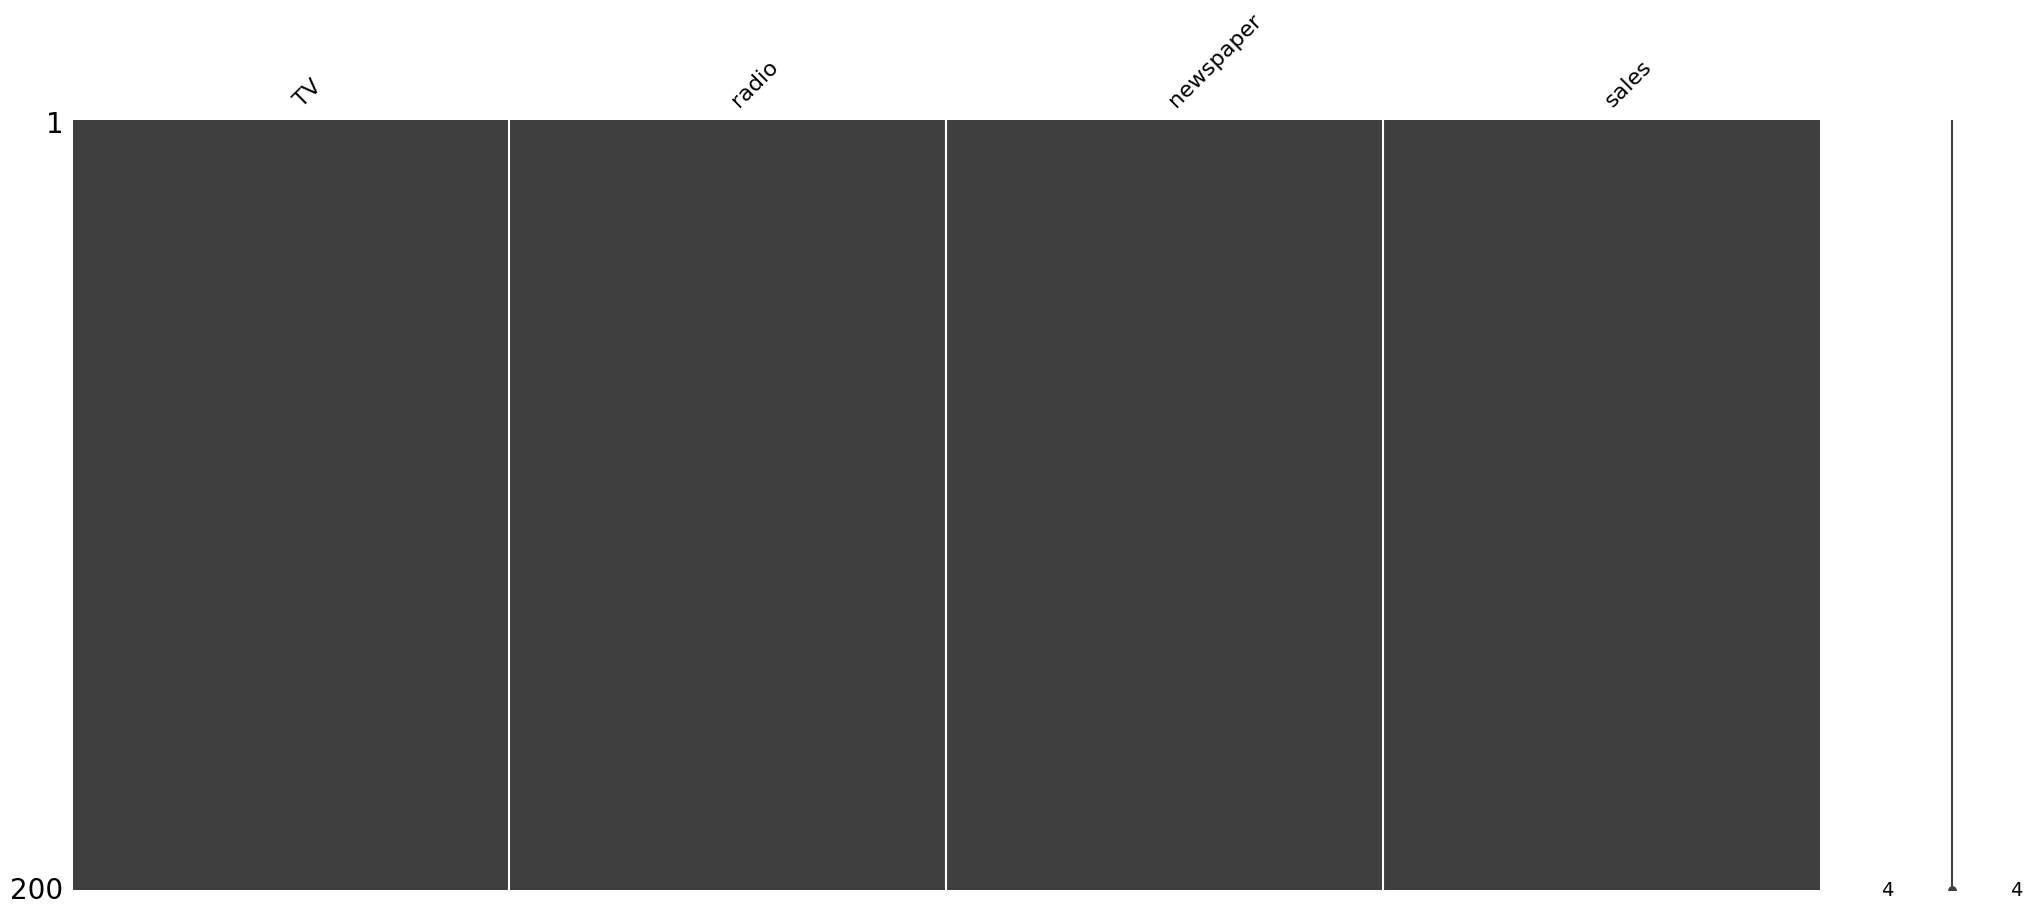

In [13]:
msno.matrix(df);

In [14]:
# altta örnek null hucreleri olan bir resim (farklı bir data setinden alınmıştır)

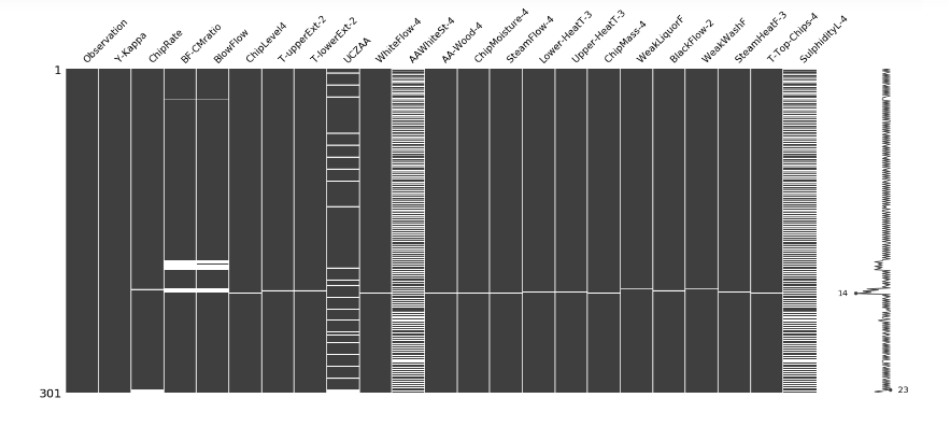

In [15]:
df.describe().T

count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
sales      200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0

In [16]:
# data setini özetleyen bir kütüphane
#!pip install summarytools

In [17]:
from summarytools import dfSummary
dfSummary(df)

In [18]:
# mean ve Std değerlerinin birbirine yakınlığının outlier tespitindeki önemi hakkında bir örnek

print ( np.mean([100,110,120,115]))
print ( np.std([100,110,120,115]))

111.25
7.39509972887452


In [19]:
print ( np.mean([100,110,120,700]))
print ( np.std([100,110,120,700]))

257.5
255.57533136044253


In [20]:
print ( np.mean([100,110,120,900]))
print ( np.std([100,110,120,900]))

307.5
342.153109002388


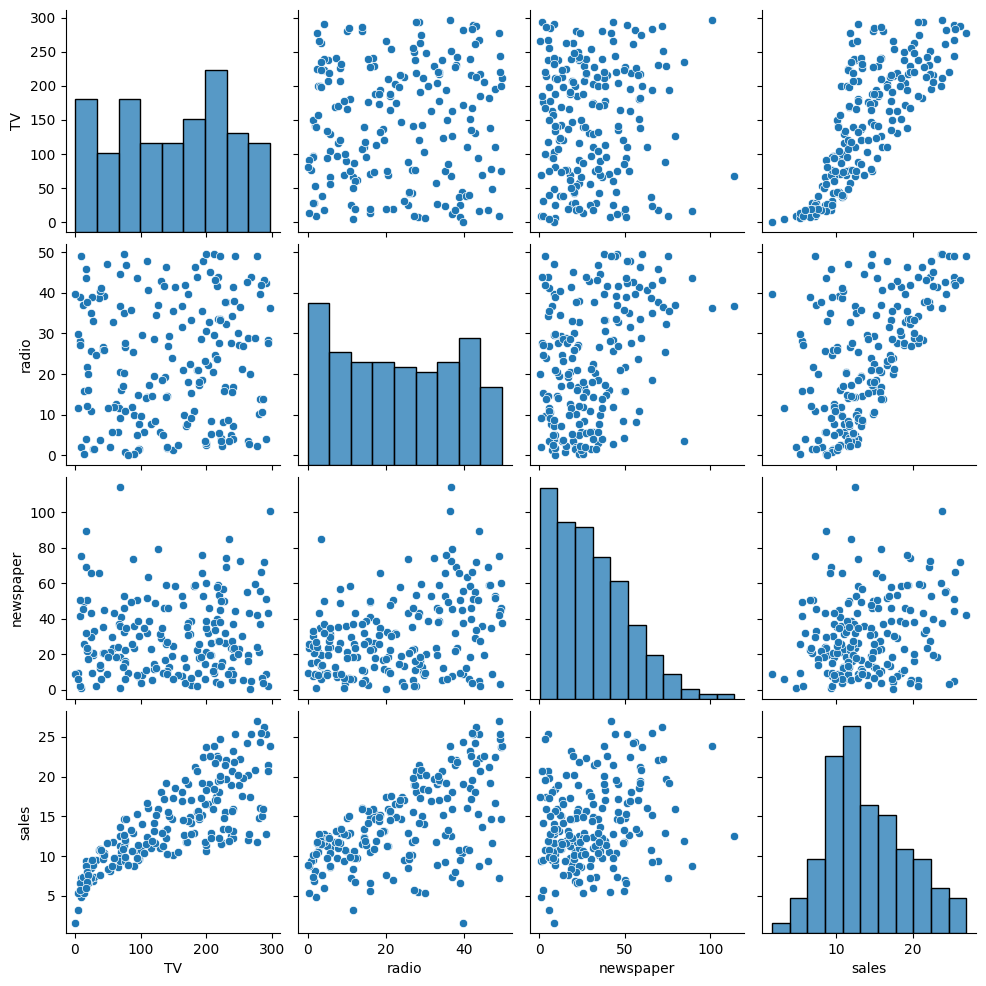

In [21]:
sns.pairplot(df);

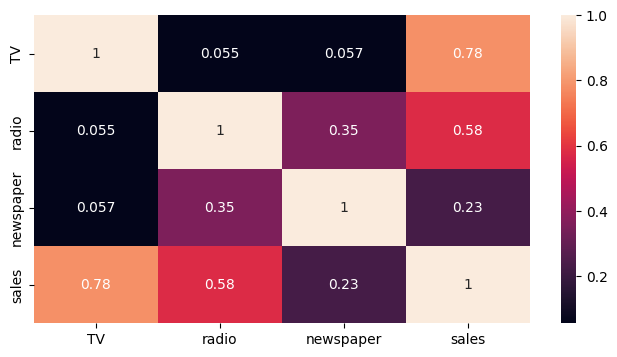

In [22]:
sns.heatmap(df.corr(), annot=True);

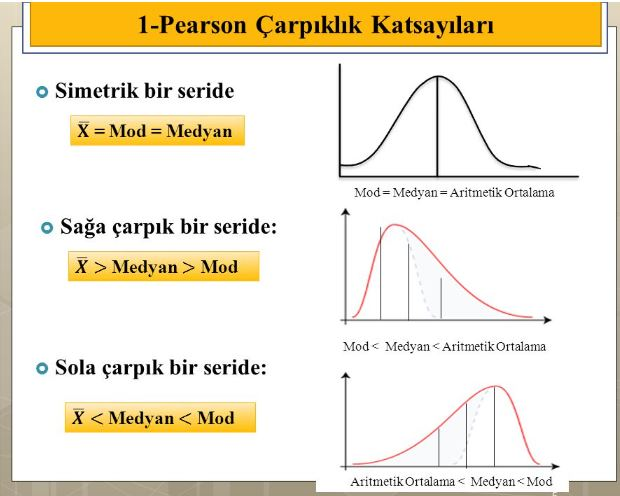

In [23]:
from scipy.stats import skew

In [24]:
# skewness tespiti için bir döngü
for i in df.drop(columns = "sales").columns:
    print(i, skew(df[i]))

# sales sütunu haricindeki tüm feature ların skewness degerini hesaplar

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


 - -1 ile + 1 arasındaki skewness degerlerinde dagılımın kabaca simetrik oldugu kabul edilebilir

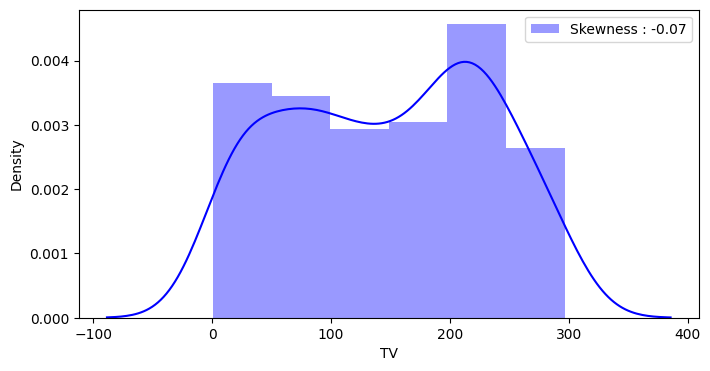

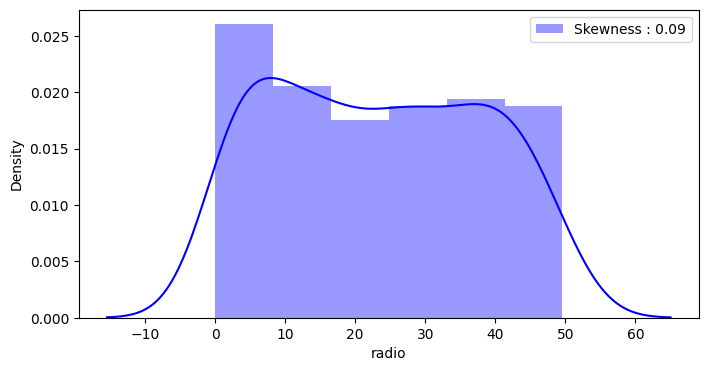

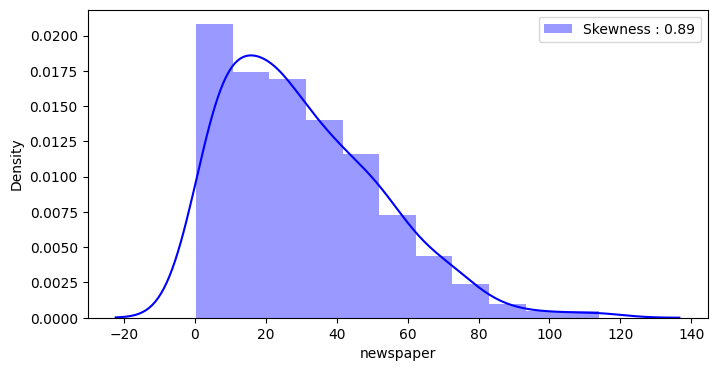

In [25]:
for j in df.drop(columns = "sales").columns:     #"sales" sütunu dataframe'den kaldırılıyor
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))   #  j sütununa ait veri dağılımı grafiği çiziliyor. grafiğin üzerinde gösterilen etiketi oluşturur. Etiket, o sütunun çarpıklık değerini (skewness) içerir
    g = g.legend(loc= "best")   #  grafiğin üzerine eklenen etiketin konumunu en iyi yere yerleştirmes
    plt.show()

In [26]:
df.corr()   #correlation bakalım

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

In [27]:
 !pip install ipywidgets ydata-profiling

In [28]:
# load the ydata_profiling package
from ydata_profiling import ProfileReport

In [29]:
# use ProfileReport
pr_df = ProfileReport(df)

In [30]:
# show pr_df
pr_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Train-Test Split

In [31]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [32]:
!pip install scikit-learn 

In [33]:
# ML için kullanılan kütüphane Scikit-Learn kütüphanesidir

# !pip install scikit-learn 
# !pip install sklearn

Neden x ve y olarak ayırıyoruz. Çünkü supervised learning in gereği labellamak. X leri incele y ile ilişkisini kur ve öğren. 

In [34]:
#labellama
X = df.drop(columns="sales")  # df[["TV", "radio", "newspaper"]] , Indep.variable'lar X e atandı
y = df["sales"]  # modelimin önüne hedef olarak target variable mı atadım.
print(X,y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [35]:
from sklearn.model_selection import train_test_split
#Veri setinizi randomly olarak eğitim (training) ve test (testing) alt kümelerine ayırmak için kullanılır.

- Data < 1000 ise       train %70 test %30 ,  
- 1000 < data < 100.000 train %80-90 test %10-20 , 
- 100K < data < 1 M     train %95 , test %5 ,
- data > 1 M            train %99 test %1 .

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42) # 

train_test_split() fonk ile splitting yapilir

train_test_split(X, y, test_size=0.3, random_state=42): Bu fonksiyon çağrısı ile X  ve y  veri setleri rastgele olarak eğitim ve test alt kümelerine ayrılır.

test_size=0.3: Veri kümesinin %30'si test seti olarak ayrılacak anlamına gelir. Geri kalan %70'i eğitim seti olarak kullanılır.

random_state=42: Rastgelelik için sabit bir başlangıç noktası belirler. Aynı kod tekrar çalıştırıldığında aynı sonuçları almayı sağlar. Bu, modelin tekrarlanabilirliği ve sonuçların tutarlılığı için önemlidir.

Eğitim seti (train set) modelin eğitildiği verilerdir. Test seti ise modelin performansını değerlendirmek için kullanılan veri kümesidir. Model, test setindeki verileri daha önce görmediği için, bu ayrım modelin genelleme yeteneğini ölçmeye yardımcı olur.



X_train: Eğitim veri setinin özelliklerini (features) içerir.

X_test: Test veri setinin özelliklerini (features) içerir.

y_train: Eğitim veri setinin etiketlerini (labels/targets) içerir.

y_test: Test veri setinin etiketlerini (labels/targets) içerir.


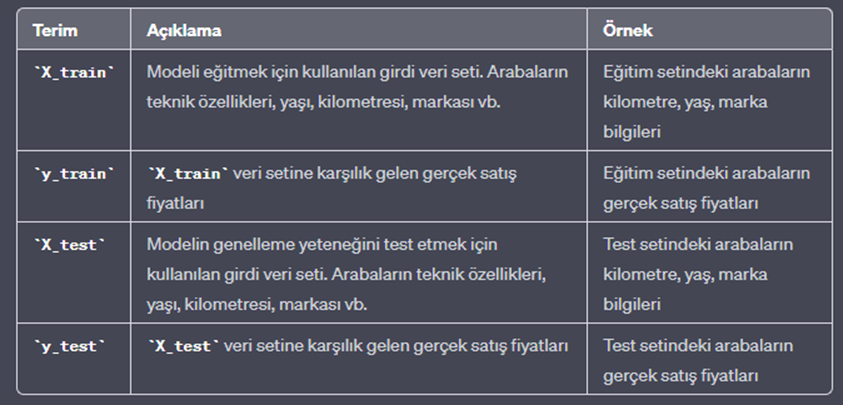

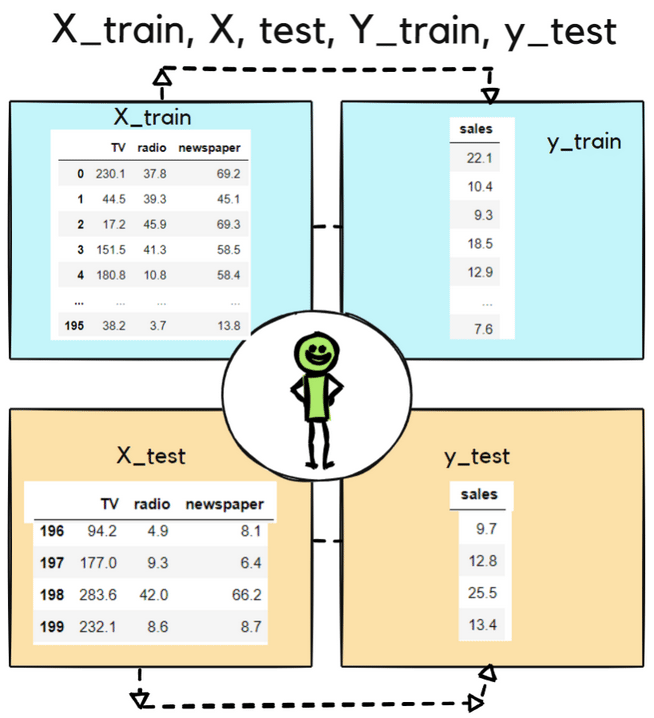

y prediction için X_test e bakacağız daha sonra y_test ile karşılaştırıp başarı oranını belirleyeceğiz. 

In [37]:
df.sample(15)

TV  radio  newspaper  sales
68   237.4   27.5       11.0   18.9
135   48.3   47.0        8.5   11.6
31   112.9   17.4       38.6   11.9
140   73.4   17.0       12.9   10.9
99   135.2   41.7       45.9   17.2
16    67.8   36.6      114.0   12.5
158   11.7   36.9       45.2    7.3
147  243.2   49.0       44.3   25.4
171  164.5   20.9       47.4   14.5
29    70.6   16.0       40.8   10.5
63   102.7   29.6        8.4   14.0
65    69.0    9.3        0.9    9.3
180  156.6    2.6        8.3   10.5
182   56.2    5.7       29.7    8.7
54   262.7   28.8       15.9   20.2

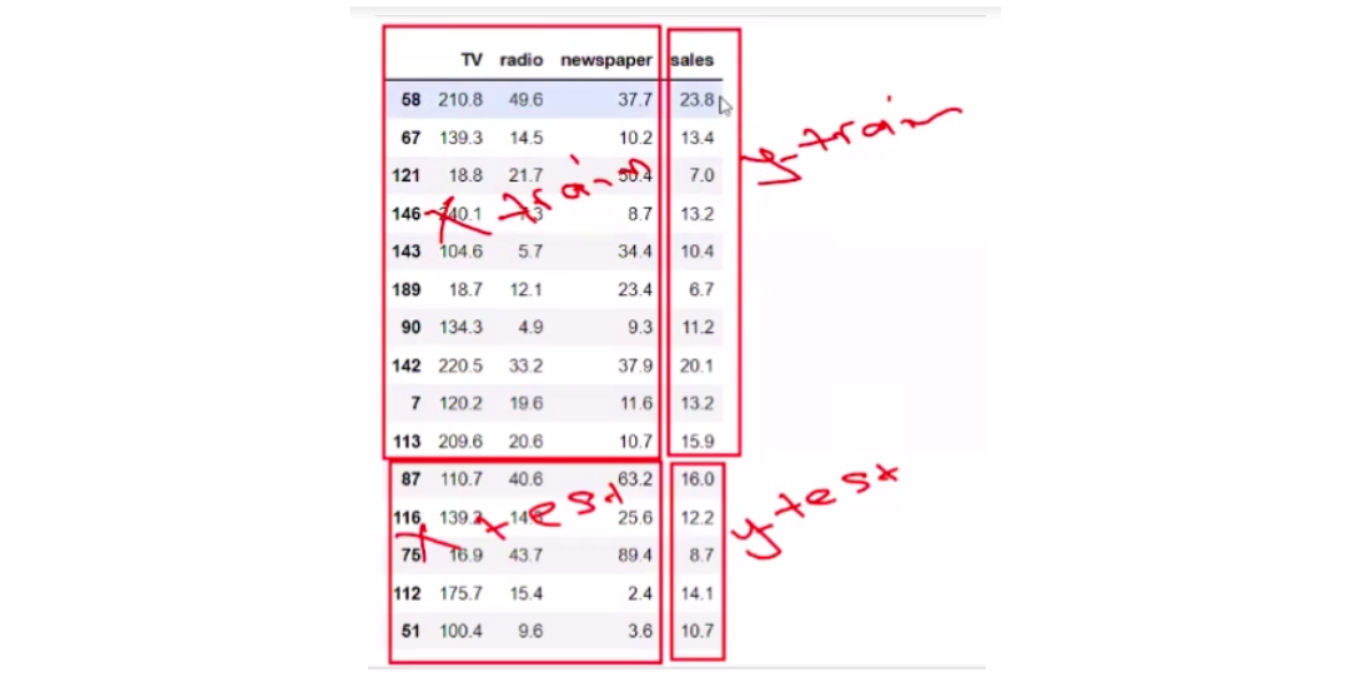

**NOTES**:

---en çok kullanılan R2 ve RMSE bize ypred ve y_test karşılaştırmasında bize hakemlik yapacaklar. 

**EK NOTE**:


Gradient Descent = optimizasyon methodu = videoyu izle = 

Başlangıç Noktası: İlk olarak, rastgele bir başlangıç noktası seçilir.
Türev Hesaplama: Kayıp fonksiyonunun türevi (gradyan) hesaplanır. Türev, fonksiyonun eğimini gösterir ve bu eğim, fonksiyonun en hızlı artış yönünü belirler.


Yukarıdaki şekli vadi gibi düşün amacımız en yakın noktadan aşağı doğru inmek. Çünkü cost function maliyeti minimize etmek. 
w ve b değerlerini belirledik. soldaki nokta şimdi algoritma kendisine en yakın alt noktayı bulur adım adım oraya doğru gider. 
Şimdi de başlangıç değerini sağdaki nokta yaptı. Etrafına baktı kendisine en yakın alt nokta sağda olduğu için o alt noktaya doğru yolan  koyuldu yokuş aşağı indi.

ML de arka planda bu algoritma çalışır. Cross validationu bu yüzden yapıyoruz görmediği vadilere bırakarak en uygun sayıları bulmaya çalışıyor. çalışması bu şekilde tepe noktalarını gösterip minmuma inmeye çalışmasını sağlamak. 

Gradient Descent, lineer regresyon, lojistik regresyon, sinir ağları gibi birçok makine öğrenimi algoritmasında önemli bir rol oynar.


Optimizasyon en iyi sonucu elde etmek için sistemin iyileştirilmesi. 


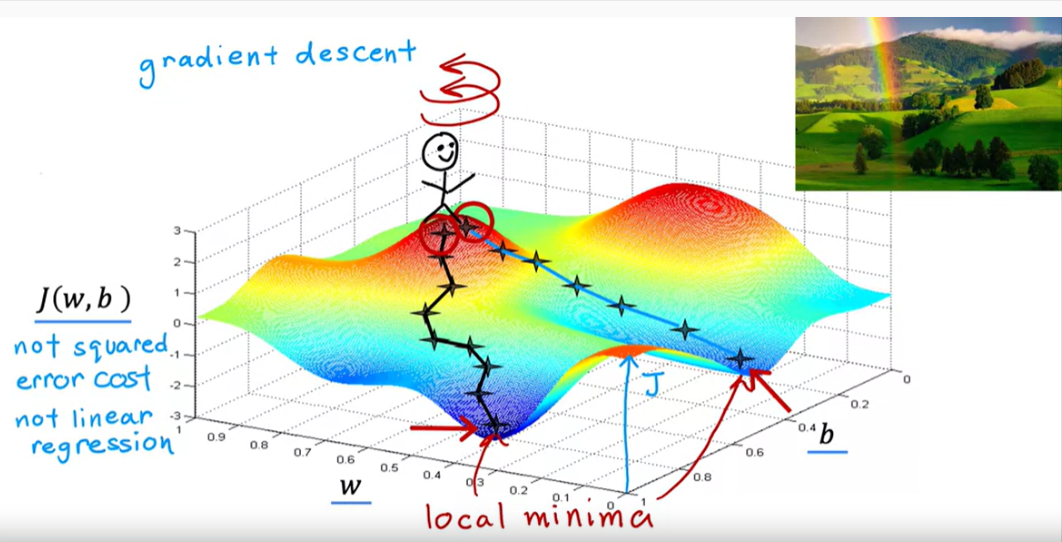

https://medium.com/deep-learning-turkiye/gradient-descent-nedir-3ec6afcb9900

In [38]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

# train ve test veri kümelerinin features ların  shape lerini yazdırır

X Train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape : (60, 3)
Y Test features shape : (60,)


In [39]:
# üstteki kopda alternatif oalrak shape lere bakmak iin:
#Print("Train features shape: ", X_train.shape)
#Print("Train target shape: ", y_train.shape)
#Print("Test features shape: ", X_test.shape)
#Print("Test target shape: ", y_test.shape)

In [40]:
X_train

TV  radio  newspaper
169  284.3   10.6        6.4
97   184.9   21.0       22.0
31   112.9   17.4       38.6
12    23.8   35.1       65.9
35   290.7    4.1        8.5
..     ...    ...        ...
106   25.0   11.0       29.7
14   204.1   32.9       46.0
92   217.7   33.5       59.0
179  165.6   10.0       17.6
102  280.2   10.1       21.4

[140 rows x 3 columns]

In [41]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

In [42]:
X_test

TV  radio  newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2
115   75.1   35.0       52.7
69   216.8   43.9       27.2
170   50.0   11.6       18.4
174  222.4    3.4       13.1
45   175.1   22.5       31.5
66    31.5   24.6        2.2
182   56.2    5.7       29.7
165  234.5    3.4       84.8
78     5.4   29.9        9.4
186  139.5    2.1       26.6
177  170.2    7.8       35.2
56     7.3   28.1       41.4
152  197.6   23.3       14.2
82    75.3   20.3       32.5
68   237.4   27.5       11.0
124  229.5   32.3       74.2
16    67.8   36.6      114.0
148   38.0   40.3       11.9
93   250.9   36.5       72.3
65    69.0    9.3        0.9
60    53.5    2.0       21.4
84   213.5   43.0       33.8
67   139.3   14.5       10.2
125   87.2   11.8       25.9
132    8.4   27.2        2.1
9    199.8    2.6       21.2
18    69.2   20.5       18.3
55   198.9   49.4       60.0
75    16.9   43.7       89.4
150  280.7   13.9       37.0
104  238.2   34.3        5.3
135   48.3   47.0        8.5
137  273.7   28.9       59.7
164  117.2   14.7        5.4
76    27.5    1.6       20.7
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6
195   38.2    3.7       13.8
29    70.6   16.0       40.8
19   147.3   23.9       19.1
143  104.6    5.7       34.4
86    76.3   27.5       16.0
114   78.2   46.8       34.5
173  168.4    7.1       12.8
5      8.7   48.9       75.0
126    7.8   38.9       50.6
117   76.4    0.8       14.8
73   129.4    5.7       31.3
140   73.4   17.0       12.9
98   289.7   42.3       51.2
172   19.6   20.1       17.0
96   197.6    3.5        5.9

# Model Fitting and Compare Actual and Predicted Labels

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()

# variable a atanmaz ise ilerleyen satırlarda prediction yaparken hata alınabiliyor. 

In [45]:
# Fitting the model with training dataset (X_train and y_train): 

model.fit(X_train, y_train) # Model uzerinde train-data seti ile eğitim gerçekleşiyor. 
                            # Modeli fit etmek öğrenmeyi gerçekleştirelim demek.

LinearRegression()

In [46]:
model.coef_

# modelin katsayılarını verir. Yani slope değerleri. (TV:0.044, radio:0.199, newspaper:0.007)
# y = a*X1 + b*X2 + c*X3 + b0 denklemindeki a,b,c katsayilari egimi ifade eder

array([0.04405928, 0.1992875 , 0.00688245])

In [47]:
model.feature_names_in_

#Modeldeki feature isimlerinin sırasını verir. // bUna gore katsayilari featurlarla eslestirebilirz

array(['TV', 'radio', 'newspaper'], dtype=object)

In [48]:
model.intercept_

#modeldeki sabit sayısı verir. yani intercept x sıfır iken y değeri. Başlangıç değeri=> b0 sabit deger
# ne kadar feature olursa olsun tek bir tane intercept (b0) degeri olur

2.7089490925159048

In [49]:
#Prediction -> model.pedict() fonk --> X test kullanilarak Y pred tahminlenir

y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

y_pred = b1*TV + b2*radio + b3*newspaper + b0  

In [50]:
# herhangi bir satırdaki değerleri tahmin edelim. manuel olarak y_pred hesabı yapalım
# bu değer y_test kümesindeki rastgele secilen 95. satır olan 16.9 gerçek değerin manuel olarak tahmin hesabı yapılmış hali olacaktır. 


sum(X_test.loc[95]*model.coef_) + model.intercept_

16.565396297434837

In [51]:
# actual: gerçek degerler    
# pred: tahmin edilen değerler     
# residual: gerçek değer - tahmin değeri

# Model test asamasinda Y_test datasini kullanirsak;

my_dict = {"Actual": y_test, "pred": y_pred, "residual":y_test - y_pred}

In [52]:
comparing = pd.DataFrame(my_dict)
comparing

Actual       pred  residual
95     16.9  16.565396  0.334604
15     22.4  21.188228  1.211772
30     21.4  21.551071 -0.151071
158     7.3  10.889238 -3.589238
128    24.7  22.202320  2.497680
115    12.6  13.355569 -0.755569
69     22.3  21.196925  1.103075
170     8.4   7.350285  1.049715
174    11.5  13.275471 -1.775471
45     14.9  15.124495 -0.224495
66      9.5   9.014430  0.485570
182     8.7   6.525428  2.174572
165    11.9  14.302060 -2.402060
78      5.3   8.970260 -3.670260
186    10.3   9.456796  0.843204
177    11.7  12.004544 -0.304544
56      5.5   8.915494 -3.415494
152    16.6  16.156193  0.443807
82     11.3  10.295829  1.004171
68     18.9  18.724736  0.175264
124    19.7  19.768218 -0.068218
16     12.5  13.774690 -1.274690
148    10.9  12.496389 -1.596389
93     22.2  21.535018  0.664982
65      9.3   7.608607  1.691393
60      8.1   5.611980  2.488020
84     21.7  20.917595  0.782405
67     13.4  11.806277  1.593723
125    10.6   9.080766  1.519234
132     5.7   8.514120 -2.814120
9      10.6  12.176049 -1.576049
18     11.3   9.969194  1.330806
55     23.7  21.730090  1.969910
75      8.7  12.777706 -4.077706
150    16.1  18.101136 -2.001136
104    20.7  20.075908  0.624092
135    11.6  14.262026 -2.662026
137    20.8  20.938265 -0.138265
164    11.9  10.839388  1.060612
76      6.9   4.381906  2.518094
79     11.0   9.513324  1.486676
197    12.8  12.404863  0.395137
38     10.1  10.170454 -0.070454
24      9.7   8.090814  1.609186
122    11.6  13.163884 -1.563884
195     7.6   5.224355  2.375645
29     10.5   9.288938  1.211062
19     14.6  14.093307  0.506693
143    10.4   8.690245  1.709755
86     12.0  11.661198  0.338802
114    14.6  15.718484 -1.118484
173    11.7  11.631569  0.068431
5       7.2  13.353607 -6.153607
126     6.6  11.153147 -4.553147
117     9.4   6.336368  3.063632
73     11.0   9.761580  1.238420
140    10.9   9.419571  1.480429
98     25.4  24.255165  1.144835
172     7.6   7.695191 -0.095191
96     11.7  12.153176 -0.453176

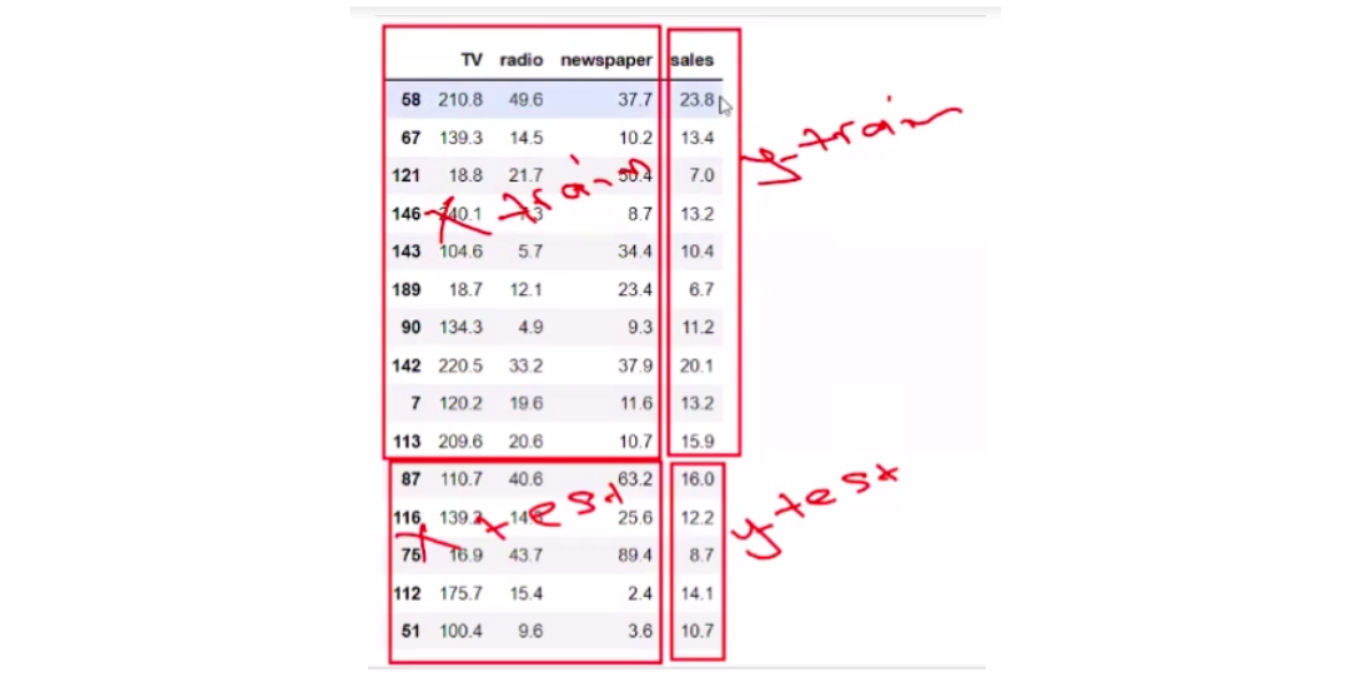

In [53]:
#ORNEK:

# yukardaki olusturulan comparing isimli data-frame den örnek olarak 25 tane çizelim. 
result_sample = comparing.head(25)
result_sample

Actual       pred  residual
95     16.9  16.565396  0.334604
15     22.4  21.188228  1.211772
30     21.4  21.551071 -0.151071
158     7.3  10.889238 -3.589238
128    24.7  22.202320  2.497680
115    12.6  13.355569 -0.755569
69     22.3  21.196925  1.103075
170     8.4   7.350285  1.049715
174    11.5  13.275471 -1.775471
45     14.9  15.124495 -0.224495
66      9.5   9.014430  0.485570
182     8.7   6.525428  2.174572
165    11.9  14.302060 -2.402060
78      5.3   8.970260 -3.670260
186    10.3   9.456796  0.843204
177    11.7  12.004544 -0.304544
56      5.5   8.915494 -3.415494
152    16.6  16.156193  0.443807
82     11.3  10.295829  1.004171
68     18.9  18.724736  0.175264
124    19.7  19.768218 -0.068218
16     12.5  13.774690 -1.274690
148    10.9  12.496389 -1.596389
93     22.2  21.535018  0.664982
65      9.3   7.608607  1.691393

<function matplotlib.pyplot.show(close=None, block=None)>

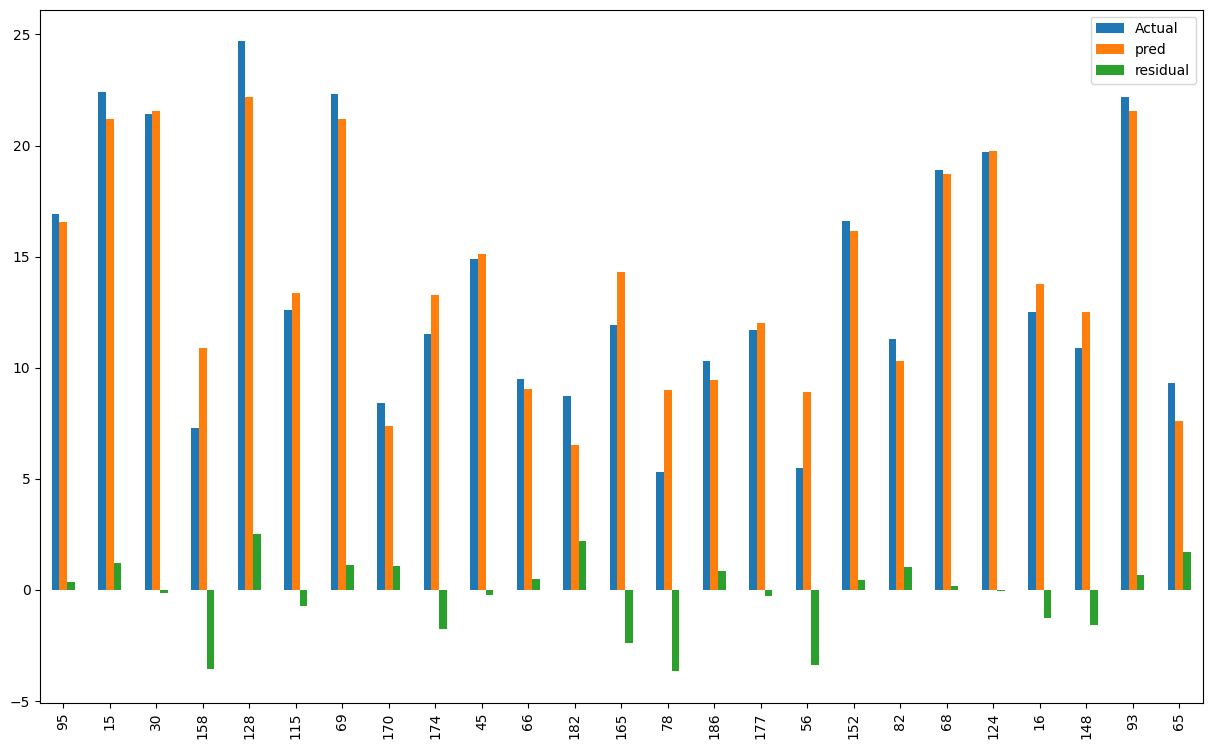

In [54]:
result_sample.plot(kind = "bar", figsize = (15,9))
plt.show

# Error Metrics

Regresyon Modelleri için Performans Değerlendirme Ölçütleri :R2, MAE, RMSE, MSE 

*Classification'da farkli metric ler kullanilir*

R-Kare (R²):

- Gerçek değer ile modelin tahminleri arasındaki uyumun bir ölçüsüdür. 
- Gerçek değerlerin varyansının, tahmin edilen değerlerin varyansına oranlanması ile bulunmaktadır. 
- Bu durum, model uyum iyiliğinin ne kadar iyi olduğunu veya olmadığını ifade etmektedir. 
- R-kare değeri yapılan matematiksel işlem sonrasında %0 ile %1 arasında bir değer alır.


RMSE:

- Büyük hatalara daha fazla ağırlık vermesinden dolayı tıpkı bir cezalandırıcı gibi davranmasıdır. 
- RMSE skorları gözlem sayısından etkilenmez
- Bu durum RMSE’nin bir avantajı olarak değerlendirilebilir. 

ORNK:
* Amacımız, ev fiyatlarını mümkün olan en doğru şekilde tahmin etmekse, RMSE metriği bizim için önemli olacaktır. 
* Öte yandan modelimiz bir yatırım stratejisi için kullanılacaksa, R-Kare metriği bizim için önemli olabilir çünkü bu, modelimizin verileri ne kadar iyi açıkladığını gösterir
* Aynı şekilde, MAE özellikle aykırı değerlerin olduğu veri setlerinde daha iyi model performansının ölçülmesinde faydalı olacktr 


** Ayrıca R-kare değerinin 1'e yakın olması beklenirken MAE, MSE ve RMSE skorlarının ise 0'a yakın olması beklenmektedir. 

https://medium.com/academy-team/makine-%C3%B6%C4%9Frenmesi-regresyon-modellerindeki-hata-metriklerine-g%C3%BCncel-bak%C4%B1%C5%9F-mae-mse-rmse-r-kare-d1ab758c5759


## MAE, MSE, RMSE, R-Kare (R2)

In [55]:
# modelin başarısını ölçelim: Error metricleri kullanilir

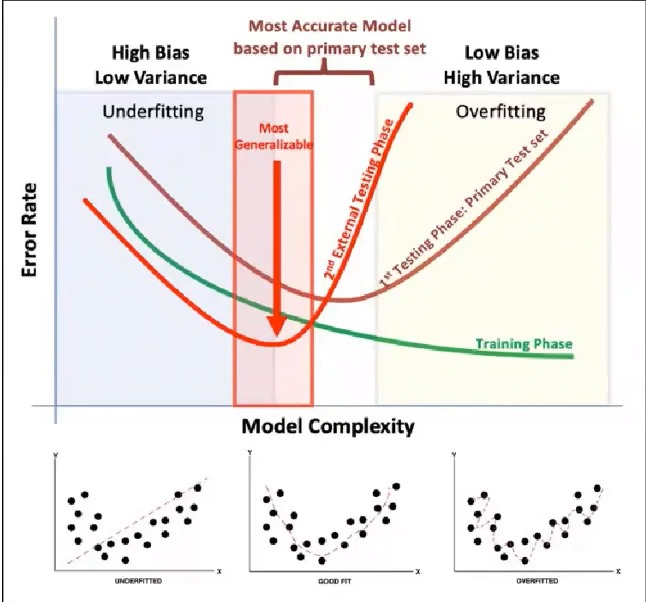

In [56]:
#Performans değerlendirme için kullanacağımız error metrikleridir
# library de mean_absolute_error, mean_squared_error, r2_score bu hesaplar fonk olarak verilmistir 
# fakat RMSE degerini manuel olarak hesaplanir genelde 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
R2_score = r2_score(y_test,y_pred)
R2_score

0.8609466508230368

In [58]:
# MAE -Mean Absolute Error -( 0 a yakın olması demek gerçek değere yakın demek. )
mae = mean_absolute_error(y_test, y_pred)
mae

1.5116692224549093

In [59]:
# MSE- Mean squared Error hesabı 
mse = mean_squared_error(y_test, y_pred)
mse

3.79679723671522

In [60]:
# RMSE- Root Mean Squared Error - RMSE  hesabı residual fazla olduğunda cezasını daha fazla gösterir. Belirginlestirir
#Outliers varsa hassas davranır. O yüzden kullanmayı tercih ederiz.

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.9485372043446387

## Normalized Mean Error Rate (platformlarda nadir bulunur)

In [61]:
#Ortalama Hata Oranı
sales_mean = df["sales"].mean()
sales_mean

14.0225

In [62]:
#(NMAE) Normalize edilmiş hata metriği
# MAE Hata Oranı - Sıfıra yakın olması iyi bir model oldugunu gösterir. 
mae / sales_mean

0.10780311802138771

Normalize etmek : rakamları küçültmeye aynı birimden konuşabilmeye, karşılaştırma yapabilmeye, aynı ölçeğe getirme, hata büyüklüğünü daha kolay yorumlarım. 

In [63]:
# RMSE Hata Oranı (Normalized RMSE)  0 a yakınsa o kadar iyidir. 
rmse / sales_mean

0.138957903679418

NRMSE değeri 0.13, modelinizin yaptığı hatanın, satışlarınızın ortalamasının %13'u kadar olduğunu
gösterir. Yani, modelinizin tahminleri gerçek satış değerlerine oldukça yakındır ve bu hata oranı,
satışlarınızın büyüklüğünel kıyasla küçük bir hata oranıdır.

# Adjusted R2 Score (düzeltilmiş R2 degeri)

- Feature selection yapildiktan sonra hesaplanan R2 score

n = gözlem sayım (data noktası sayısı) 
p = feature

Adjusted R2 = 1 - [(1 - R2) * (n - 1) / (n - p - 1)]

In [64]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)    #R2 scor hesaplar
    n = df.shape[0]      # number of observations gözlem
    p =df.shape[1]-1    # number of indep. variable = feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [65]:
adj_r2(y_test, y_pred, df)

0.8588182832335934

In [66]:
# önceki R2=0,86 idi.. 
# adjusted_r2=0.85  öncekine çok yakın çıktı.
#çünkü zaten 3 feature vardı
# alttkai örnemkte feature sayısını abartılı vererek adusted _r2 etkisini gorelim

In [67]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)    # R2 scor
    n = df.shape[0]                  # number of observations gözlem
    p = 100                          # number of indep. variable- **feature sayısını 100 olarak manuel verdik
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   
    return adj_r2

In [68]:
adj_r2(y_test, y_pred,df)

0.7204887223614578

In [69]:
# Eger sisirilmis R2 var ise, datasetten gereksiz ve etkisiz featurlar cikarildiktan sonra(Losso)
# Adjusted R2 hesaplandiginda adj_R2 score dusuk gelebilir, onceki R2 scorunda gerekesiz feature oldugunu gosterir

In [70]:
# bir görüşe göre, her eklenen feature ,için 10-15 gözlem satırı daha eklenmelidir.
# fetaure sayısı fazlalaşınca bunu  karşılığında gözlem sayısı da artmalıdır!! ????

# Evaluation Model

In [94]:
# modelin genel degerlendirilmesini bu etapta yapacagız
    # Overfitting-Underfitting var mi?
    # Residuals dagilimlari pattern gosteriyor mu?

### Comparing Train-Test Scores-Eval_metric() fonk

In [72]:
# Error metricleri hesaplayan ve yazan kod blogu

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [73]:
# Y_test datasina ait error metricleri

eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549093
MSE 		: 3.79679723671522
RMSE 		: 1.9485372043446387


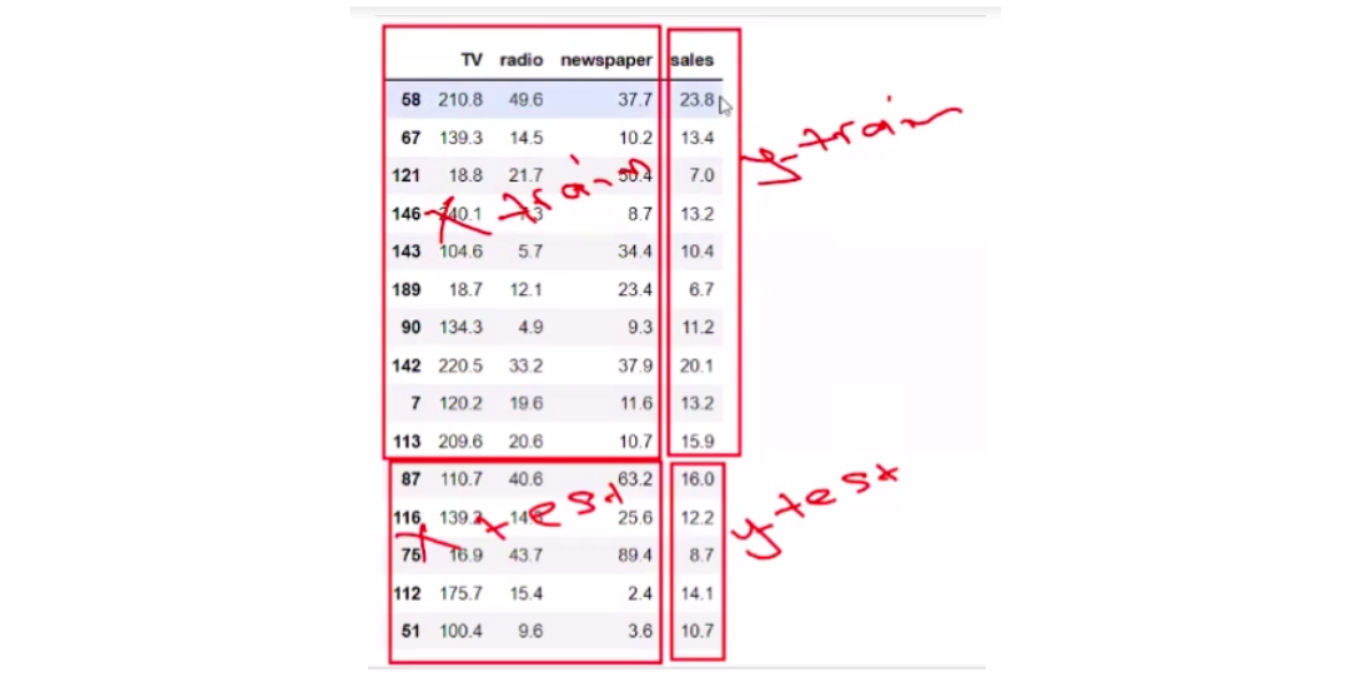

In [74]:
# Overfitting kontrolü için TRAIN datasındaki R2 yi bullaım ve 
# yukardaki TEST datasının R2 değeri olan 0,86 ile karşılaştıralım

In [75]:
# X_train degerlerinin prediction ini yapalim

y_train_pred = model.predict(X_train)

In [76]:
# Y_train datasina ait error metricleri

eval_metric(y_train, y_train_pred)

# note:  y_train_pred icin %70 dataya sahip x_train datasi kullanildi,
# R2 degeri daha yuksek, Error degerleri ise daha dusuk gelecektir

Model testing performance: 
---------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072533
MSE 		: 2.479355178905787
RMSE 		: 1.5745968305905442


In [77]:
# Burada overfitting acisindan degerlendirme yapalim;
# 0.90 - 0.86 degerleri train ve test R2 degerleridir.. (sonuclari birbirine cok yakin degerlerdir)
# Dolayisiyla bu sonuclardan OVERFITTING olmayacagi yonunde degerlendirme yapabiliriz
#NOTE: FAKAT sadece bu degerlere bakarak karar ve-re-me-yiz!!

# train ve test R2 scorelari arasindaki fark %10-15 oraninda ise bu score lar Overfitting yonunden kendini gosterebilir
# Fakat, fark buyuk degilse de yine grafikler ile gorsellestirme yapilarak Overfitting degerlendirilmelidir!!

### Residuals Distributions

In [78]:
residuals = y_test - y_pred

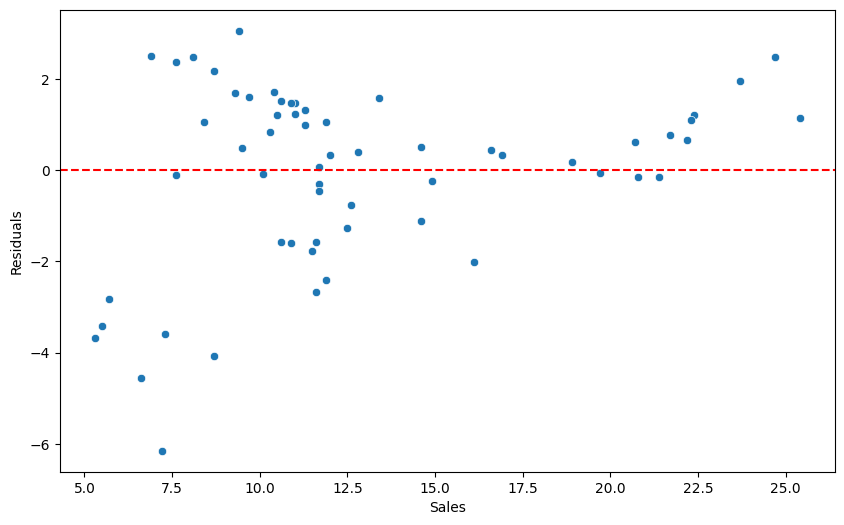

In [79]:
# Residuals Dagiliminin Incelemesi-1

plt.figure(figsize=(10, 6))
sns.scatterplot(x= y_test, y=residuals)
plt.xlabel("Sales")
plt.ylabel("Residuals")
plt.axhline(y=0, color = "r", linestyle ="--" )
plt.show()

*Bu grafikte residuals rastgele dagilim gostermektedir

- Residuals lar rastgele dagilmasi gerekir, eger dagilmaz ise bir pattern -> sistematik bir hata oldugunu gosterir
- Makine öğreniminde residual larda pattern olması, modelin tahmin hatalarında belirli bir düzen veya yapı bulunduğunu gösterir

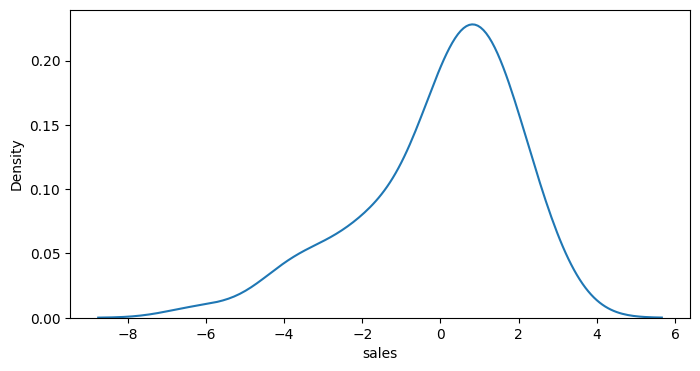

In [80]:
# Residuals Dagiliminin Incelemesi-2

sns.kdeplot(residuals); # rastgele dagilimin->  Natural dagilim gostermesi beklenir 

((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([-6.15360735, -4.5531472 , -4.07770578, -3.67026042, -3.58923816,
         -3.41549403, -2.81412012, -

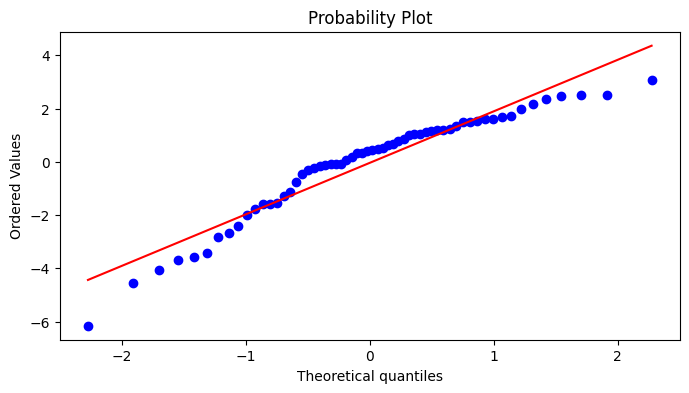

In [81]:
# Residuals Dagilim Incelemesi-3

stats.probplot(residuals, dist = "norm", plot = plt) 

Bu grafik, Q-Q (quantile-quantile) plot olarak bilinir ve bir veri setinin normal dağılıma uyup uymadığını görselleştirmek için kullanılır. 

- Kırmızı çizgi, mükemmel bir normal dağılıma sahip olan verilerin izlemesi gereken yolu temsil eder.
- Grafikteki mavi noktalar, sıralanmış verilerin teorik kuantilere karşılık gelen değerleridir.
- Eğer veriler normal dağılıma uyuyorsa, mavi noktalar kırmızı çizgi üzerinde veya çok yakınında olacaktır.

*Yatay eksen, teorik kuantilleri (normal dağılımdan beklenen değerleri) gösterir.<br>
*Dikey eksen, gerçek verilerin sıralanmış değerlerini gösterir.


In [82]:
# Residuals Dagilim incelemesi-4

skew(residuals)  # Hafif Left Skewed

-0.9865673346742723

In [83]:
!pip install yellowbrick

In [84]:
from yellowbrick.regressor import ResidualsPlot

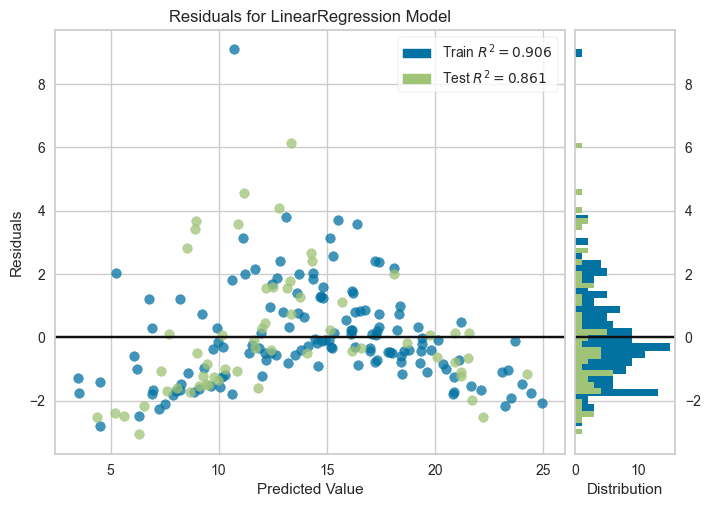

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [85]:
# Residuals Dagilim incelemesi-5

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

Residuals sıfır çizgisi etrafında rastgele dağılmışsa, modelin iyi performans gösterdiği ve herhangi bir belirgin sistematik hata olmadığı anlamına gelir.

*Yatay Eksen (Predicted Value): Modelin herbir gozlem icin tahmin ettiği (y_pred) değerleri.   <br>
*Dikey Eksen (Residuals): Gerçek değerler ile tahmin edilen değerler arasındaki farklar.

Train R2=0.906 ve Test R2=0.861: 

- Bu değerler, modelin train ve test verisi üzerindeki açıklama katsayılarını gösterir. 
- Her iki değer de oldukça yüksek, bu da modelin iyi bir genel performans sergilediğini gösterir.
- Residuals genel olarak sıfır etrafında rastgele dağılmış durumda, ancak bazı yüksek pozitif ve negatif Residuals (outlier'lar) var. Bu durum, modelin bazı noktalarda büyük hatalar yaptığını gösterebilir.

### Overfitting Kontorlunde 2.adim

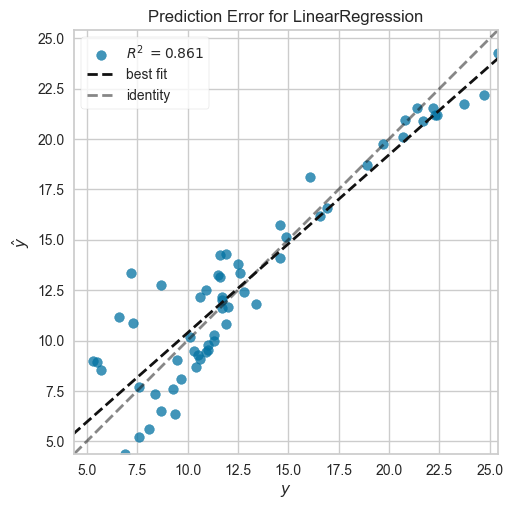

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [86]:
from yellowbrick.regressor import PredictionError

model = LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

*Bu grafik, lineer regresyon modelinin tahmin hatalarını gösteren bir Prediction Error (Tahmin Hatası) grafiğidir. <br>
*Bu tür grafikler, modelin gerçek değerler ile tahmin edilen değerler arasındaki ilişkiyi görselleştirmek için kullanılır.

- Gri çizgi ("identity"): Bu çizgi, mükemmel tahmin doğruluğunu temsil eder (R2); <br>
yani, her tahmin değeri tam olarak gerçek değere eşit olduğunda, tüm noktalar bu çizgi üzerinde olacaktır.

- Siyah çizgi ("best fit"): Bu çizgi, modelin tahmin edilen değerler ile gerçek değerler arasındaki en iyi uyumu gösterir.
- Mavi noktalar, her bir veri noktası için modelin tahmin ettiği değerler(y_pred) 

- Eğer tüm noktalar "identity" çizgisine yakınsa, model oldukça doğrudur demektir (R2=1 gibi).

R2 =0.861: Bu değer, modelin açıklama katsayısıdır ve modelin veri varyansının %86.1'ini açıkladığını gösterir. Oldukca yuksek model basari oranidir

# Final Model

In [87]:
# Artık hangi algoritma kullanılacagına karar verilmiştir.==> LinearRegression
# bu aşamada tüm data setini tekrar fit edecegiz. (train ve test olarak bölmeden)

In [95]:
final_model = LinearRegression()
final_model.fit(X, y)    # X, y yazarak tüm datayı vermiş olduk.

LinearRegression()

In [100]:
df

TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

In [99]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )
coeff_df

# data scale edilmedigi icin tum featurlar ortak bir olcekte degildir, 
# Bu nedenle bu coeff katsayilarina gore yorum yapilmasi saglikli degil 

Coefficient
TV            0.045765
radio         0.188530
newspaper    -0.001037

In [98]:
final_model.intercept_ # intercept

2.9388893694594067

# Prediction on Final Model

TV=150, Radio=20, news= 15 degerleri icin prediction yapalim;

In [91]:
adv = [[150,20,15]] 

In [92]:
final_model.predict(adv) #Eğitilmiş modeli kullanarak bu yeni girdiler için bağımlı değişkenin tahminini yapar.

array([13.55862413])

- y_final_pred= 13.55; bu belirli TV, Radio ve Newspaper harcamaları için tahmin ettiği bağımlı değişken değeridir.
- Model, verilen adv girdileri (TV = 150, Radio = 20, Newspaper = 15) için satışların yaklaşık 13.55 bin adet olacağını tahmin etmiştir.

*Bu, modelin TV, Radio ve Newspaper reklam bütçelerinin satışlar üzerindeki etkisini öğrenmesi ve bu öğrenmeye dayalı olarak yeni verilerle tahmin yapması sonucu ortaya çıkar.

# Example: Simple-Multiple Linear Regression 

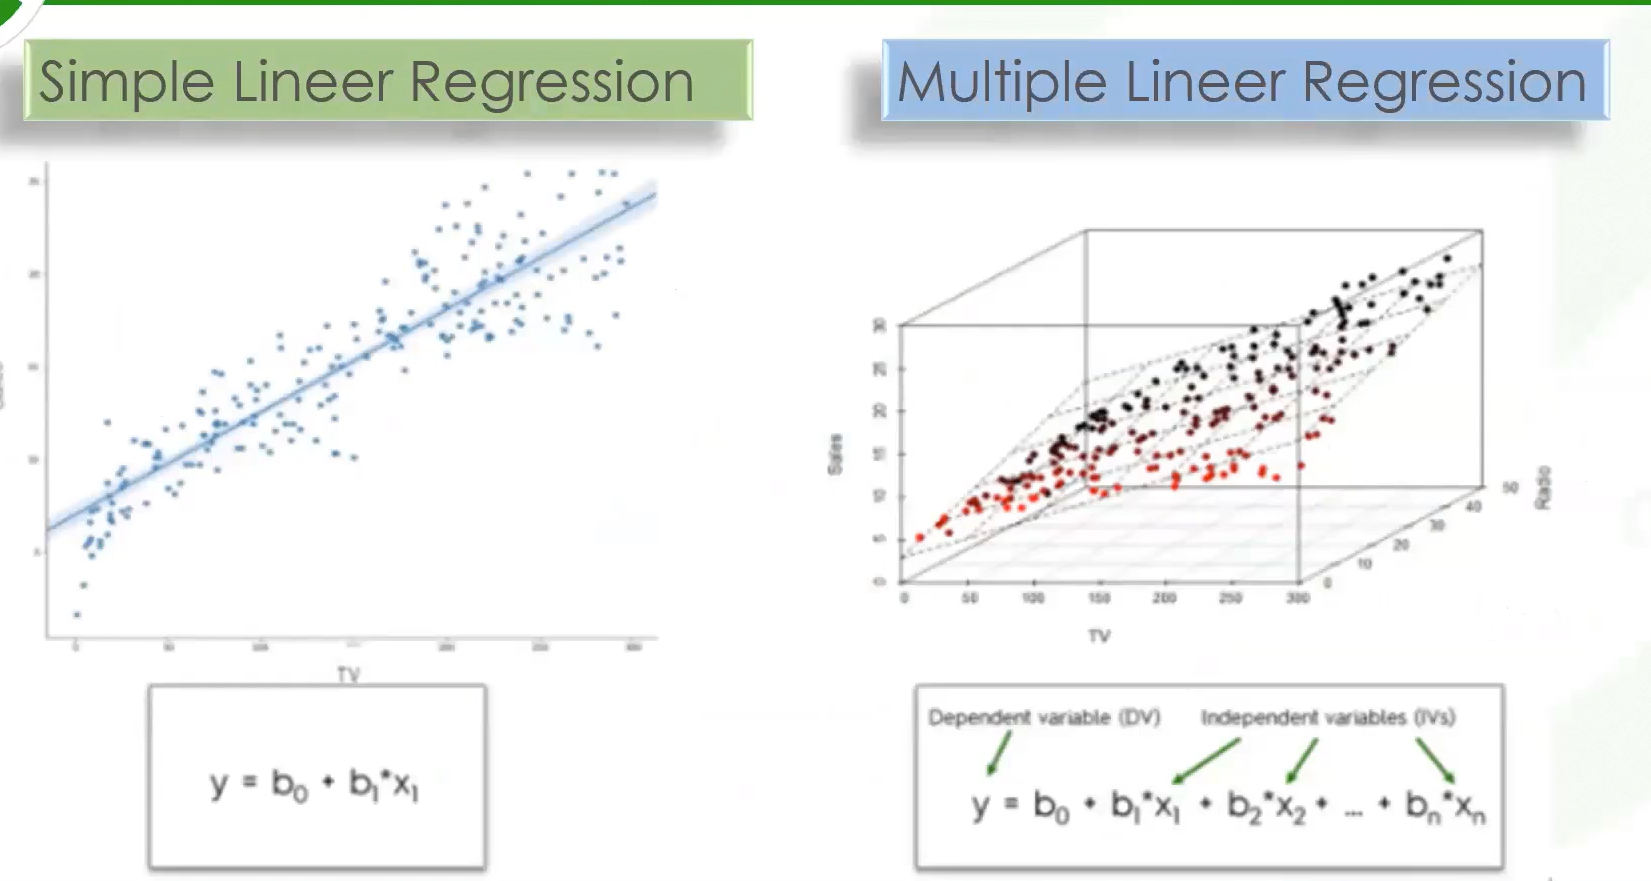

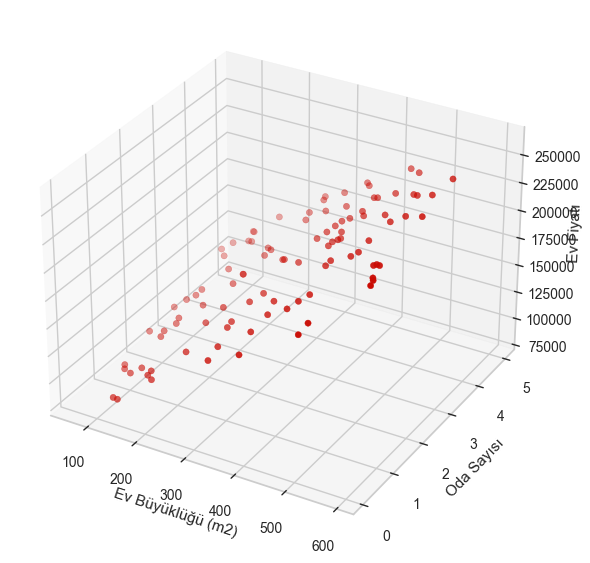

In [93]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Örnek veriler
np.random.seed(0)
X1 = np.random.rand(100, 1) * 540 + 60  # 60 m2 ile 600 m2 arasında ev büyüklüğü
X2 = np.random.rand(100, 1) * 5  # 0 ile 5 arasında oda sayısı
Y = 50000 + 300 * X1 + 10000 * X2 + np.random.randn(100, 1) * 1000

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, c='r', marker='o')

ax.set_xlabel('Ev Büyüklüğü (m2)')
ax.set_ylabel('Oda Sayısı')
ax.set_zlabel('Ev Fiyatı')

plt.show()


Kırmızı noktalar, her bir evin büyüklüğü, oda sayısı ve fiyatını temsil eder. Her bir nokta, belirli bir evin bu özelliklere sahip olduğunu gösterir.

Genel Eğilim: Ev büyüklüğü ve oda sayısı arttıkça, ev fiyatlarının da arttığı net bir şekilde gözlemlenebilir. Bu, modelin doğru bir şekilde bağımsız değişkenlerin bağımlı değişken üzerindeki etkisini tahmin ettiğini gösterir.

Korelasyon ve Etki:

Veri noktalarının belirgin bir doğrusal düzlem üzerinde toplandığı görülüyor. Bu, bağımsız değişkenler ile bağımlı değişken arasında güçlü bir doğrusal ilişki olduğunu gösterir.
Ev büyüklüğü ve oda sayısı arttıkça ev fiyatlarının da arttığı net bir şekilde gözlemlenebilir.

Sonuç
Bu görsel, Multiple Linear Regression modelinin bağımsız değişkenler (ev büyüklüğü ve oda sayısı) ile bağımlı değişken (ev fiyatı) arasındaki ilişkiyi nasıl doğru bir şekilde tahmin ettiğini göstermektedir. Ev büyüklüğü ve oda sayısı arttıkça ev fiyatlarının da arttığını net bir şekilde gözlemleyebilirsiniz. Bu da modelin doğrusal ilişkiyi iyi bir şekilde yakaladığını ve tahminlerinin genellikle doğru olduğunu göstermektedir.